In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import datetime

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
import functions_python as funcs
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 1000)

In [2]:
# import the dataframe of stations we scored based off of location
highlighted_stations = pd.read_csv('important_stations.csv')

# import, concat, and clean

In [3]:
# read in August and september 2019 mta data
df_list = ['190803', '190810', '190817', '190824', '190831', '190907', '190914', '190921', '190928']

In [4]:
# concatenate the dataframe and add a date_time col
concat_df = funcs.combine_dfs_add_time(df_list)
concat_df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  07/27/2019  16:00:00   

      DESC  ENTRIES    EXITS           DATE_TIME  DAY_INT   DAY_STR  
0  REGULAR  7148288  2418935 2019-07-27 00:00:00        5  Saturday  
1  REGULAR  7148306  2418939 2019-07-27 04:00:00        5  Saturday  
2  REGULAR  7148326  2418975 2019-07-27 08:00:00        5  Saturday  
3  REGULAR  7148441  2419042 2019-07-27 12:00:00        5  Saturday  
4  REGULAR  7148647  2419101 2019-07-27 16:00:00        5  Saturday

In [5]:
#add the time difference
concat_df = funcs.add_entry_and_exit_differences(concat_df)
concat_df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
31945  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  00:00:00   
31946  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  04:00:00   
31947  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  08:00:00   
31948  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  12:00:00   
31949  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  16:00:00   

          DESC   ENTRIES     EXITS           DATE_TIME  DAY_INT   DAY_STR  \
31945  REGULAR  14868945  16617731 2019-07-27 00:00:00        5  Saturday   
31946  REGULAR  14868945  16617731 2019-07-27 04:00:00        5  Saturday   
31947  REGULAR  14868945  16617731 2019-07-27 08:00:00        5  Saturday   
31948  REGULAR  14868945  16617732 2019-07-27 12:00:00        5  Saturday   
31949  REGULAR  14868945  16617734 2019-07-27 16:00:00        5  Saturday   

       ENTRIES_DIFF  EXIT_DIFF  
31945           0.0        0.0  
31946           0.0        0.0  
31947           0.0        0.0  
31948           0.0        1.0  
31949           0.0        2.0

In [6]:
len(concat_df.index)

1853013

In [7]:
concat_df["ENTRIES_DIFF"].describe()

count    1.853013e+06
mean    -5.437497e+03
std      4.137171e+06
min     -2.129137e+09
25%      8.000000e+00
50%      6.900000e+01
75%      2.250000e+02
max      1.953780e+09
Name: ENTRIES_DIFF, dtype: float64

In [8]:
# clean the data remove the crazy big numbers (entry/exits > 3000)
cleaned_df = funcs.clean_entry_exit_values(concat_df, 3000)
cleaned_df.head()

You removed 22459 rows in the cleaning


C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
31945  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  00:00:00   
31946  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  04:00:00   
31947  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  08:00:00   
31948  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  12:00:00   
31949  H007  R248  00-00-00    1 AV        L      BMT  07/27/2019  16:00:00   

          DESC   ENTRIES     EXITS           DATE_TIME  DAY_INT   DAY_STR  \
31945  REGULAR  14868945  16617731 2019-07-27 00:00:00        5  Saturday   
31946  REGULAR  14868945  16617731 2019-07-27 04:00:00        5  Saturday   
31947  REGULAR  14868945  16617731 2019-07-27 08:00:00        5  Saturday   
31948  REGULAR  14868945  16617732 2019-07-27 12:00:00        5  Saturday   
31949  REGULAR  14868945  16617734 2019-07-27 16:00:00        5  Saturday   

       ENTRIES_DIFF  EXIT_DIFF  
31945           0.0        0.0  
31946           0.0        0.0  
31947           0.0        0.0  
31948           0.0        1.0  
31949           0.0        2.0

In [9]:
len(cleaned_df.index)

1830554

In [10]:
# what percent did we get rid of
(len(concat_df.index) - len(cleaned_df.index) )/ len(concat_df.index)

0.012120260354352614

In [11]:
# describe looks much better, but didnt affect 75 or 50 percentile really, thats good
cleaned_df["ENTRIES_DIFF"].describe()

count    1.830554e+06
mean     1.659849e+02
std      2.402719e+02
min      0.000000e+00
25%      9.000000e+00
50%      7.000000e+01
75%      2.270000e+02
max      2.987000e+03
Name: ENTRIES_DIFF, dtype: float64

# Now We can start analyzing ridership

In [12]:
# Find the total traffic for the whole data frame at each station
totals_per_station = funcs.totals_combined_per_station(cleaned_df)
totals_per_station.sort_values("COMBINED", ascending=False).head()

ENTRIES_DIFF  EXIT_DIFF    COMBINED
STATION                                             
34 ST-PENN STA      8714449.0  8026585.0  16741034.0
GRD CNTRL-42 ST     7303776.0  6566430.0  13870206.0
34 ST-HERALD SQ     6463263.0  6117308.0  12580571.0
TIMES SQ-42 ST      5422587.0  5175792.0  10598379.0
14 ST-UNION SQ      5403834.0  5149572.0  10553406.0

In [13]:
# Find the avg traffic for the whole data frame at each station
# WE WILL USE THIS LATER TO DETERMINE WHAT STATIONS TO FOCUS ON!!!
avg_per_station = funcs.avg_combined_per_station(cleaned_df)
avg_per_station.sort_values("COMBINED", ascending=False).head()

ENTRIES_DIFF      EXIT_DIFF       COMBINED
STATION                                                     
34 ST-PENN STA   138324.587302  127406.111111  265730.698413
GRD CNTRL-42 ST  115932.952381  104229.047619  220162.000000
34 ST-HERALD SQ  102591.476190   97100.126984  199691.603175
TIMES SQ-42 ST    86072.809524   82155.428571  168228.238095
14 ST-UNION SQ    85775.142857   81739.238095  167514.380952

In [14]:
# calculate the avg traffic on each day of the week for each station
avg_traffic_per_day_of_week = funcs.avg_per_day_of_week(cleaned_df)
avg_traffic_per_day_of_week.head()

ENTRIES_DIFF     EXIT_DIFF      COMBINED
STATION DAY_INT DAY_STR                                            
1 AV    0       Monday     13744.777778  15721.222222  29466.000000
        1       Tuesday    16417.777778  18115.000000  34532.777778
        2       Wednesday  17289.444444  19241.555556  36531.000000
        3       Thursday   17675.000000  19097.666667  36772.666667
        4       Friday     17775.666667  19705.222222  37480.888889

In [15]:
# calculate the avg traffic at each time slot on each day for each station
avg_traffic_per_day_per_time_per_station = funcs.avg_per_day_of_week_and_time(cleaned_df)
avg_traffic_per_day_per_time_per_station.head()

ENTRIES_DIFF    EXIT_DIFF     COMBINED
STATION DAY_INT DAY_STR TIME                                            
1 AV    0       Monday  00:00:00    718.333333   831.777778  1550.111111
                        04:00:00    145.666667   153.111111   298.777778
                        08:00:00   1123.000000  2412.000000  3535.000000
                        12:00:00   3777.000000  4041.000000  7818.000000
                        16:00:00   3194.444444  3123.666667  6318.111111

# Now We Look At Our Interested Stations

In [16]:
# clean the highlighted stations
highlighted_stations.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
highlighted_stations.rename(columns={'stations': 'STATION'}, inplace=True)
highlighted_stations.head()

STATION  university   tech   rich  total score
0             1 AV       False   True   True            3
1  116 ST-COLUMBIA        True  False  False            4
2           135 ST        True  False  False            4
3  137 ST CITY COL        True  False  False            4
4            14 ST       False   True   True            3

In [17]:
# merge with the avg daily ridership df
avg_per_station_with_score = pd.merge(avg_per_station, highlighted_stations, on='STATION')
avg_per_station_with_score.head()

STATION   ENTRIES_DIFF      EXIT_DIFF       COMBINED  university  \
0   34 ST-PENN STA  138324.587302  127406.111111  265730.698413       False   
1  GRD CNTRL-42 ST  115932.952381  104229.047619  220162.000000       False   
2  34 ST-HERALD SQ  102591.476190   97100.126984  199691.603175       False   
3   TIMES SQ-42 ST   86072.809524   82155.428571  168228.238095       False   
4   14 ST-UNION SQ   85775.142857   81739.238095  167514.380952       False   

    tech  rich  total score  
0  False  True            1  
1  False  True            1  
2  False  True            1  
3  False  True            1  
4  False  True            1

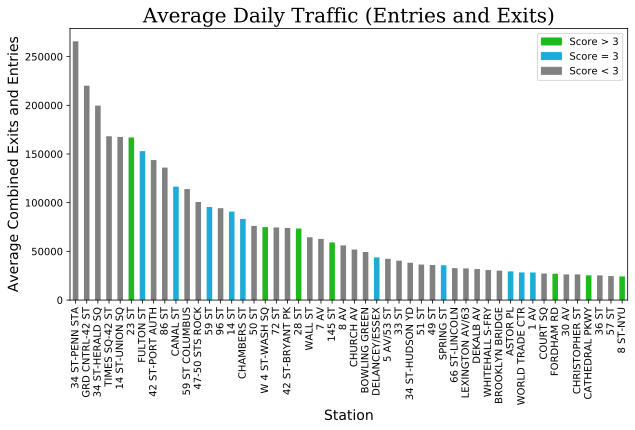

In [18]:
# plot the average ridership per day with the color being score
funcs.create_interested_colored_bar_graph(avg_per_station_with_score, 50)

grey_patch = mpatches.Patch(color='grey', label='Score < 3')
blue_patch = mpatches.Patch(color='#1DACD6', label='Score = 3')
green_patch = mpatches.Patch(color='#1DB91D', label='Score > 3')


plt.legend(handles=[green_patch, blue_patch, grey_patch])
plt.ylabel('Average Combined Exits and Entries', fontsize = 14);
plt.xlabel('Station', fontsize = 14);
plt.title('Average Daily Traffic (Entries and Exits)', family='serif', fontsize = 20);

# Now Lets Figure Out Which Iportant Ones To Focus On

In [82]:
# filter the merged dataframe to keep only the stations with interest score gretater than or = 3
avg_per_station_high_scores = avg_per_station_with_score[avg_per_station_with_score["total score"]>=3]
# take the top 17, this is what we will focus on
focused_stations_df = avg_per_station_high_scores.head(10)
# grab the station row (we will use this as our graph index)
focused_stations = focused_stations_df["STATION"]
# stations we want oprdered by traffic
focused_stations_df
focused_stations_df.to_csv()


',STATION,ENTRIES_DIFF,EXIT_DIFF,COMBINED,university,tech,rich,total score,color\n5,23 ST,95256.74603174604,71732.11111111111,166988.85714285716,True,True,True,7,#1DB91D\n6,FULTON ST,81251.20634920635,71720.66666666667,152971.87301587302,False,True,True,3,#1DACD6\n9,CANAL ST,63881.93650793651,52640.34920634921,116522.28571428571,False,True,True,3,#1DACD6\n12,59 ST,50999.09523809524,44564.333333333336,95563.42857142858,False,True,True,3,#1DACD6\n14,14 ST,48140.12698412698,42714.8253968254,90854.95238095238,False,True,True,3,#1DACD6\n15,CHAMBERS ST,46580.5873015873,36743.968253968254,83324.55555555556,False,True,True,3,#1DACD6\n17,W 4 ST-WASH SQ,38698.22222222222,36147.77777777778,74846.0,True,True,True,7,#1DB91D\n20,28 ST,38525.53968253968,34918.80952380953,73444.3492063492,True,True,True,7,#1DB91D\n23,145 ST,30920.20634920635,28202.698412698413,59122.90476190476,True,False,False,4,#1DB91D\n27,DELANCEY/ESSEX,24621.4126984127,19178.47619047619,43799.88888888889,False,True,True,3,#1DACD6\

In [20]:
# perecent of total traffic through these stations
percent_of_total_traffic = focused_stations_df["COMBINED"].sum() / avg_per_station_with_score["COMBINED"].sum()
percent_of_total_traffic

0.224799889097257

In [21]:
# percent of important traffic through these stations
percent_of_important_traffic = focused_stations_df["COMBINED"].sum() / avg_per_station_high_scores["COMBINED"].sum()
percent_of_important_traffic

0.7216588869667623

In [22]:
# add a normalized column
avg_per_station_high_scores["NORMALIZED_TRAFFIC"] = avg_per_station_high_scores["COMBINED"]/avg_per_station_high_scores["COMBINED"].sum()

/Users/ryanwerth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


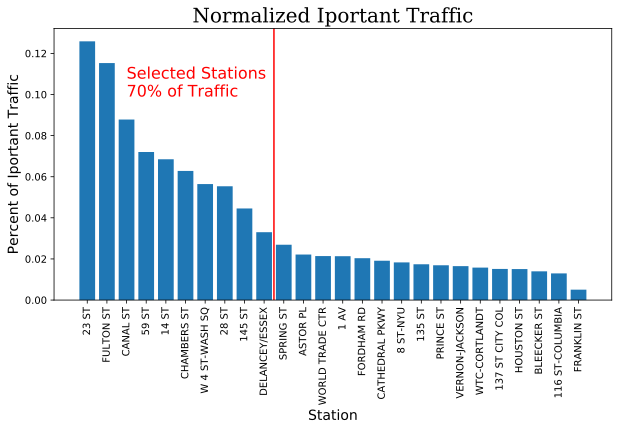

In [23]:
# plot the percentage of each station as it compares to all important stations
plt.figure(figsize=[10,5])
plt.bar(avg_per_station_high_scores["STATION"], avg_per_station_high_scores["COMBINED"]/avg_per_station_high_scores["COMBINED"].sum())
plt.ylabel('Percent of Iportant Traffic', fontsize = 14);
plt.xlabel('Station', fontsize = 14);
plt.title('Normalized Iportant Traffic', family='serif', fontsize = 20);
plt.text(2,0.099,'Selected Stations \n70% of Traffic',fontsize = 16,color = 'red');
plt.axvline(x=9.5, color='red')
plt.xticks(rotation=90);

# Now Lets Look At When To Focus

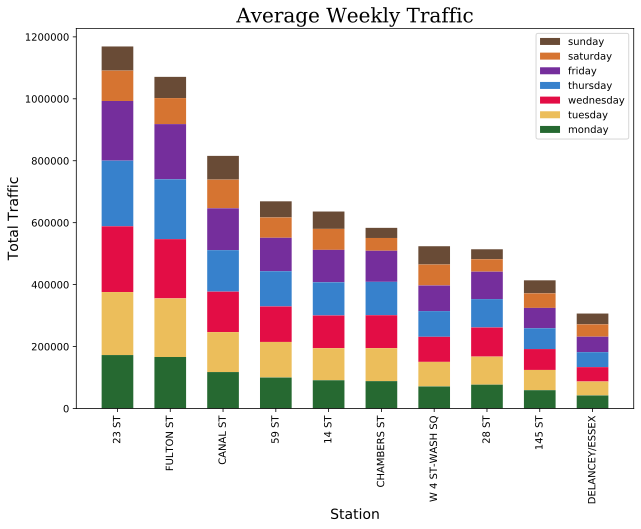

In [24]:
# look at what days we should focus on
plt.figure(figsize=[10,7])
plt.ylabel('Total Traffic', fontsize = 14);
plt.xlabel('Station', fontsize = 14);
plt.title('Average Weekly Traffic', family='serif', fontsize = 20)
funcs.create_day_of_week_stacked_bar_graph(avg_traffic_per_day_of_week, focused_stations)

In [75]:
# combine days of week
focused_mask = avg_traffic_per_day_of_week.reset_index()["STATION"].isin(focused_stations)
avg_traffic_per_day_of_week_focused = avg_traffic_per_day_of_week.reset_index()[focused_mask]
avg_traffic_per_day_of_week_focused.head()

STATION  DAY_INT    DAY_STR  ENTRIES_DIFF     EXIT_DIFF       COMBINED
91   14 ST        0     Monday  47746.666667  43328.777778   91075.444444
92   14 ST        1    Tuesday  55877.000000  47834.555556  103711.555556
93   14 ST        2  Wednesday  57202.222222  48386.111111  105588.333333
94   14 ST        3   Thursday  57670.000000  49478.555556  107148.555556
95   14 ST        4     Friday  56235.777778  48421.888889  104657.666667

In [76]:
# add normalized column
aggregated_per_day_of_week = avg_traffic_per_day_of_week_focused.groupby("DAY_STR","DAY_INT")[["ENTRIES_DIFF", "EXIT_DIFF", "COMBINED"]].sum()
aggregated_per_day_of_week["COMBINED_NORMALIZED"] = aggregated_per_day_of_week["COMBINED"] / aggregated_per_day_of_week["COMBINED"].sum()
aggregated_per_day_of_week

ValueError: No axis named DAY_INT for object type <class 'pandas.core.frame.DataFrame'>

In [27]:
aggregated_per_day_of_week = aggregated_per_day_of_week.sort_values(by=["COMBINED"], ascending=False).reset_index()
aggregated_per_day_of_week

DAY_STR   ENTRIES_DIFF      EXIT_DIFF      COMBINED  COMBINED_NORMALIZED
0   Thursday  630561.666667  527375.222222  1.157937e+06             0.172773
1  Wednesday  628310.444444  521333.000000  1.149643e+06             0.171535
2    Tuesday  614264.666667  512853.555556  1.127118e+06             0.168175
3     Friday  604395.111111  501538.555556  1.105934e+06             0.165014
4     Monday  529592.888889  455457.666667  9.850506e+05             0.146977
5   Saturday  342982.000000  300772.666667  6.437547e+05             0.096053
6     Sunday  282018.777778  250617.444444  5.326362e+05             0.079473

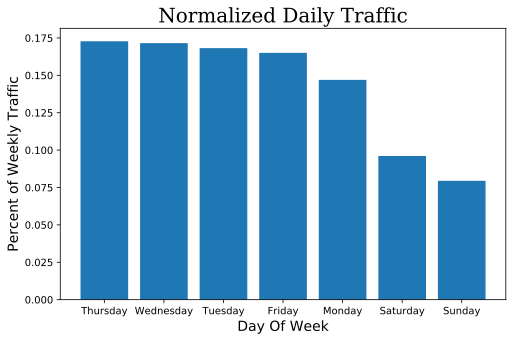

In [28]:
# plot the normalized traffic on each day of the week
plt.figure(figsize=[8,5])
plt.bar(aggregated_per_day_of_week["DAY_STR"], aggregated_per_day_of_week["COMBINED_NORMALIZED"])
plt.ylabel('Percent of Weekly Traffic', fontsize = 14);
plt.xlabel('Day Of Week', fontsize = 14);
plt.title('Normalized Daily Traffic', family='serif', fontsize = 20);

In [29]:
# look at time and days of week
focused_time_mask = avg_traffic_per_day_per_time_per_station.reset_index()["STATION"].isin(focused_stations)
avg_traffic_per_day_per_time_per_station = avg_traffic_per_day_per_time_per_station.reset_index()[focused_time_mask]


In [30]:
avg_traffic_per_day_per_time_per_station.head(20)

STATION  DAY_INT  DAY_STR      TIME  ENTRIES_DIFF    EXIT_DIFF  \
962   14 ST        0   Monday  00:00:00   3074.333333  1787.777778   
963   14 ST        0   Monday  01:00:00   1251.444444   701.444444   
964   14 ST        0   Monday  04:00:00    480.555556   307.111111   
965   14 ST        0   Monday  05:00:00    184.111111   110.777778   
966   14 ST        0   Monday  08:00:00   1317.111111  2530.666667   
967   14 ST        0   Monday  09:00:00   1250.333333  3507.888889   
968   14 ST        0   Monday  12:00:00   5853.111111  9583.888889   
969   14 ST        0   Monday  13:00:00   1930.000000  5062.888889   
970   14 ST        0   Monday  16:00:00   6860.888889  5945.888889   
971   14 ST        0   Monday  17:00:00   4896.777778  3081.444444   
972   14 ST        0   Monday  20:00:00  13827.444444  7935.222222   
973   14 ST        0   Monday  21:00:00   6820.555556  2773.777778   
974   14 ST        1  Tuesday  00:00:00   5542.444444  2007.777778   
975   14 ST        1  Tuesday  01:00:00   1721.444444   677.000000   
976   14 ST        1  Tuesday  04:00:00    628.555556   317.444444   
977   14 ST        1  Tuesday  05:00:00    214.222222   135.555556   
978   14 ST        1  Tuesday  08:00:00   1571.333333  2998.111111   
979   14 ST        1  Tuesday  08:13:14    102.000000    53.000000   
980   14 ST        1  Tuesday  09:00:00   1423.555556  4047.111111   
981   14 ST        1  Tuesday  10:45:04   1125.000000  4449.000000   

         COMBINED  
962   4862.111111  
963   1952.888889  
964    787.666667  
965    294.888889  
966   3847.777778  
967   4758.222222  
968  15437.000000  
969   6992.888889  
970  12806.777778  
971   7978.222222  
972  21762.666667  
973   9594.333333  
974   7550.222222  
975   2398.444444  
976    946.000000  
977    349.777778  
978   4569.444444  
979    155.000000  
980   5470.666667  
981   5574.000000

In [31]:
# convert time to time
avg_traffic_per_day_per_time_per_station["TIME"] = pd.to_datetime(avg_traffic_per_day_per_time_per_station["TIME"], format='%H:%M:%S').dt.time

In [32]:
# create datetime time objects to make buckets
midnight = datetime.time(0,1,0,0)
four_am = datetime.time(4,0,0,0)
eight_am = datetime.time(8,0,0,0)
noon = datetime.time(12,0,0,0)
four_pm = datetime.time(16,0,0,0)
eight_pm = datetime.time(20,0,0,0)


In [33]:
# use these time objects to create masks to create buckets
midnight_mask = avg_traffic_per_day_per_time_per_station["TIME"] < midnight

four_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > midnight) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= four_am)

eight_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > four_am) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= eight_am)

noon_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > eight_am) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= noon)

sixteen_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > noon) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= four_pm)

twenty_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > four_pm) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= eight_pm)


In [34]:
# create buckets of times with their totals
traffic_list = [
    avg_traffic_per_day_per_time_per_station[four_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[eight_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[noon_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[sixteen_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[twenty_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[midnight_mask]["COMBINED"].sum()
]

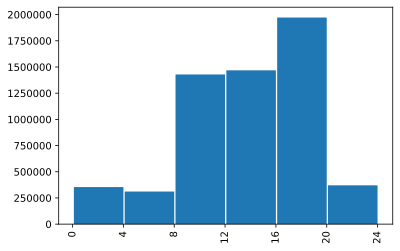

In [37]:
hour_list = [4, 8, 12, 16, 20, 24]
plt.bar(hour_list, traffic_list, width=-3.9, align='edge')
ticks_x = np.linspace(0, 24, 7)
plt.xticks(ticks_x)
plt.xticks(rotation=90);

# Try To Get a Heat Map

In [40]:
locations_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
locations_df.head()

Station ID  Complex ID GTFS Stop ID Division     Line  \
0           1           1          R01      BMT  Astoria   
1           2           2          R03      BMT  Astoria   
2           3           3          R04      BMT  Astoria   
3           4           4          R05      BMT  Astoria   
4           5           5          R06      BMT  Astoria   

                Stop Name Borough Daytime Routes Structure  GTFS Latitude  \
0  Astoria - Ditmars Blvd       Q            N W  Elevated      40.775036   
1            Astoria Blvd       Q            N W  Elevated      40.770258   
2                   30 Av       Q            N W  Elevated      40.766779   
3                Broadway       Q            N W  Elevated      40.761820   
4                   36 Av       Q            N W  Elevated      40.756804   

   GTFS Longitude   North Direction Label South Direction Label  
0      -73.912034                     NaN             Manhattan  
1      -73.917843            Ditmars Blvd             Manhattan  
2      -73.921479  Astoria - Ditmars Blvd             Manhattan  
3      -73.925508  Astoria - Ditmars Blvd             Manhattan  
4      -73.929575  Astoria - Ditmars Blvd             Manhattan

In [52]:
len(cleaned_df.STATION.unique()), len(locations_df["Stop Name"].unique())

(378, 377)

In [67]:
locations_df.rename(columns={"Stop Name":"STATION"}, inplace=True)
locations_df["STATION"] = locations_df["STATION"].str.lower()
locations_df.head()

Station ID  Complex ID UNIT Division     Line                 STATION  \
0           1           1  R01      BMT  Astoria  astoria - ditmars blvd   
1           2           2  R03      BMT  Astoria            astoria blvd   
2           3           3  R04      BMT  Astoria                   30 av   
3           4           4  R05      BMT  Astoria                broadway   
4           5           5  R06      BMT  Astoria                   36 av   

  Borough Daytime Routes Structure  GTFS Latitude  GTFS Longitude  \
0       Q            N W  Elevated      40.775036      -73.912034   
1       Q            N W  Elevated      40.770258      -73.917843   
2       Q            N W  Elevated      40.766779      -73.921479   
3       Q            N W  Elevated      40.761820      -73.925508   
4       Q            N W  Elevated      40.756804      -73.929575   

    North Direction Label South Direction Label  
0                     NaN             Manhattan  
1            Ditmars Blvd             Manhattan  
2  Astoria - Ditmars Blvd             Manhattan  
3  Astoria - Ditmars Blvd             Manhattan  
4  Astoria - Ditmars Blvd             Manhattan

In [68]:
avg_per_station = avg_per_station.reset_index()
avg_per_station["STATION"] = avg_per_station["STATION"].str.lower()
avg_per_station.head()

STATION   ENTRIES_DIFF      EXIT_DIFF       COMBINED
0   34 st-penn sta  138324.587302  127406.111111  265730.698413
1  grd cntrl-42 st  115932.952381  104229.047619  220162.000000
2  34 st-herald sq  102591.476190   97100.126984  199691.603175
3   times sq-42 st   86072.809524   82155.428571  168228.238095
4   14 st-union sq   85775.142857   81739.238095  167514.380952

In [69]:
avg_with_loc = pd.merge(avg_per_station, locations_df,on="STATION")

In [71]:
len(avg_with_loc["STATION"].unique())

239

In [73]:
thirtyFour = cleaned_df[cleaned_df["STATION"]=="34 ST-PENN STA"]